# Intermediate Assignment 2: Cleaning Data

***Importing data and libraries***

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import datetime as dt
import requests

%matplotlib inline

**1 - Save USDA Food Sales Dataset and import data into a dataframe**

In [2]:
# import data and save primary data sheet to dataframe
path = r"C:\Users\JohnTaylor\DSTP_Assignments\Data\StateAndCategoryfoodsales_Edited.xlsx"
excel_df = pd.ExcelFile(path)
data_og = excel_df.parse("By State and Product Category",skiprows=[0])
data_og.head()


,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 2 years ago,Volume sales 2 years ago,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
0,2019-10-06,Alabama,Alcohol,23580628$,2969760.0,836512.0,22435659.0,2.976745e+06,814794.612815,NaN,NaN,NaN,5.1,-0.2,2.7,NaN,NaN,NaN
1,2019-10-13,Alabama,Alchohol,23191408$,2891303.0,828622.0,23309843.0,2.977404e+06,854998.728859,NaN,NaN,NaN,-0.5,-2.9,-3.1,NaN,NaN,NaN
2,2019-10-20,AL,Alcohol,21743590$,2727065.0,761632.0,21063269.0,2.744731e+06,765890.421220,NaN,NaN,NaN,3.2,-0.6,-0.6,NaN,NaN,NaN
3,2019-10-27,Alabama,Alcohol,21929512$,2761075.0,767176.0,20183470.0,2.650938e+06,713505.261937,NaN,NaN,NaN,8.7,4.2,7.5,NaN,NaN,NaN
4,2019-11-03,Alabama,Alcohol,23150890$,2868207.0,813904.0,22560881.0,2.883969e+06,801435.915630,NaN,NaN,NaN,2.6,-0.5,1.6,NaN,NaN,NaN


In [3]:
# create working copy to edit
data = data_og.copy()

**2 - Look for extraneous rows at the start and end of the USDA Dataset. Remove these rows.**

In [4]:
# check last rows of the dataframe
pd.set_option('display.max_columns', 15)
print(data.iloc[-15:])

                                                    Date    State    Category  \
60534                                         2022-01-02  Wyoming      Vegies   
60535                                         2022-01-09  Wyoming  Vegetables   
60536                                         2022-01-16  Wyoming  Vegetables   
60537                                         2022-01-23  Wyoming  Vegetables   
60538                                         2022-01-30  Wyoming  Vegetables   
60539                                         2022-02-06  Wyoming  Vegetables   
60540                                         2022-02-13  Wyoming  Vegetables   
60541                                         2022-02-20  Wyoming  Vegetables   
60542                                         2022-02-27  Wyoming  Vegetables   
60543                                         2022-03-06  Wyoming  Vegetables   
60544                                         2022-03-13  Wyoming  Vegetables   
60545                       

In [5]:
# remove the last 4 rows from the dataset
data = data.iloc[:-4,:]
print(data.shape)
# expect 60545 rows

(60545, 18)


**3 - Print datatypes of columns. Are there numberical fields that may need to be converted?**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60545 entries, 0 to 60544
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            60545 non-null  object 
 1   State                           60545 non-null  object 
 2   Category                        60545 non-null  object 
 3   Dollars                         60545 non-null  object 
 4   Unit sales                      60543 non-null  float64
 5   Volume sales                    55041 non-null  float64
 6   Dollars last year               60274 non-null  float64
 7   Unit sales last year            60264 non-null  float64
 8   Volume sales last year          54792 non-null  float64
 9   Dollars 2 years ago             35678 non-null  float64
 10  Volume sales 2 years ago        35671 non-null  float64
 11  Unit sales 2 years ago          32432 non-null  float64
 12  Percent change dollars 1 year   

In [7]:
# take a closer look at Dollars
print(data.loc[:5, 'Dollars'])

0    23580628$
1    23191408$
2    21743590$
3    21929512$
4    23150890$
5    22276720$
Name: Dollars, dtype: object


In [8]:
# remove dollar sign and convert to numeric
data['Dollars'] = data['Dollars'].str.strip('$')
data['Dollars'] = data['Dollars'].astype(float)
data['Dollars'].head()

0    23580628.0
1    23191408.0
2    21743590.0
3    21929512.0
4    23150890.0
Name: Dollars, dtype: float64

**4 - Check the dataset for true duplicates and remove them**

In [9]:
duplicateRows = data[data.duplicated()]
duplicateRows

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,...,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
9,2019-12-01,Alabama,Booze,27755828.0,3215722.0,958602.0,19613160.0,...,NaN,41.5,27.0,38.5,NaN,NaN,NaN


In [10]:
# remove the duplicate
data.drop_duplicates(keep='first', inplace=True)

# check shape - expecting 60544 rows
print(data.shape)

(60544, 18)


**5 - Some variables were coded incorrectly due to entry error. Print the unique values of your categorical variables and their counts. Remap them to the correct category.**

In [11]:
# get unique values and counts for the categorical columns
cats = ['Date','State','Category']

for cat in cats:
    unique = data[cat].unique()
    print('Unique Values in the {} Column:'.format(cat))
    for i in unique:
        count = data[cat].value_counts()[i]
        print([i, count])
    
    
    
    

Unique Values in the Date Column:
['2019-10-06', 473]
['2019-10-13', 473]
['2019-10-20', 473]
['2019-10-27', 473]
['2019-11-03', 473]
['2019-11-10', 473]
['2019-11-17', 473]
['2019-11-24', 473]
['2019-12-01', 473]
['2019-12-08', 473]
['2019-12-15', 473]
['2019-12-22', 473]
['2019-12-29', 473]
['2020-01-05', 473]
['2020-01-12', 473]
['2020-01-19', 473]
['2020-01-26', 473]
['2020-02-02', 473]
['2020-02-09', 473]
['2020-02-16', 473]
['2020-02-23', 473]
['2020-03-01', 473]
['2020-03-08', 473]
['2020-03-15', 473]
['2020-03-22', 473]
['2020-03-29', 473]
['2020-04-05', 473]
['2020-04-12', 473]
['2020-04-19', 473]
['2020-04-26', 473]
['2020-05-03', 473]
['2020-05-10', 473]
['2020-05-17', 473]
['2020-05-24', 473]
['2020-05-31', 473]
['2020-06-07', 473]
['2020-06-14', 473]
['2020-06-21', 473]
['2020-06-28', 473]
['2020-07-05', 473]
['2020-07-12', 473]
['2020-07-19', 473]
['2020-07-26', 473]
['2020-08-02', 473]
['2020-08-09', 473]
['2020-08-16', 473]
['2020-08-23', 473]
['2020-08-30', 473]
['2020

In [12]:
# fix state column by mapping incorrect values using a dictionary
states_fixed = {
    'AL ' : 'Alabama',
    'AL' : 'Alabama',
    'Bama' : 'Alabama',
    'Arizonia': 'Arizona',
    'AZ' : 'Arizona',
    'Arkanss' : 'Arkansas',
    'CALifornia' : 'California',
    'Colrado' : 'Colorado',
    'Floride' : 'Florida',
    'Illlnois' : 'Illinois',
    'IOWA' : 'Iowa',
    'TX' : 'Texas',
    'Tex' : 'Texas'
}

# update the column
data['State'] = data['State'].replace(states_fixed)
data['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
# map incorrect Category column values the same way
cats_fixed = {
    'Alchohol' : 'Alcohol',
    'Booze' : 'Alcohol',
    'Moonshine' : 'Alcohol',
    'alchohol' : 'Alcohol',
    'Alcohols' : 'Alcohol',
    'Milk' : 'Dairy',
    'milk' : 'Dairy',
    'dairy' : 'Dairy',
    'lactose' : 'Dairy',
    'Froots' : 'Fruits',
    'Vargetable' : 'Vegetables',
    'Vegetanles' : 'Vegetables',
    'Vegies' : 'Vegetables'
}

# update the column
data['Category'] = data['Category'].replace(cats_fixed)
data['Category'].unique()

array(['Alcohol', 'Beverages', 'Commercially prepared items', 'Dairy',
       'Fats and oils', 'Fruits', 'Grains', 'Meats, eggs, and nuts',
       'Other', 'Sugar and sweeteners', 'Vegetables'], dtype=object)

**6 - Are there any missing values in the numeric fields? How would you handle these?**

In [15]:
data.isna().sum()

Date                                  0
State                                 0
Category                              0
Dollars                               0
Unit sales                            2
Volume sales                       5504
Dollars last year                   271
Unit sales last year                281
Volume sales last year             5753
Dollars 2 years ago               24866
Volume sales 2 years ago          24873
Unit sales 2 years ago            28112
Percent change dollars 1 year       271
Percent change units 1 year         281
Percent change volume 1 year       5753
Percent change dollars 2 years    24866
Percent change units 2 years      24875
Percent change volume 2 years     28112
dtype: int64

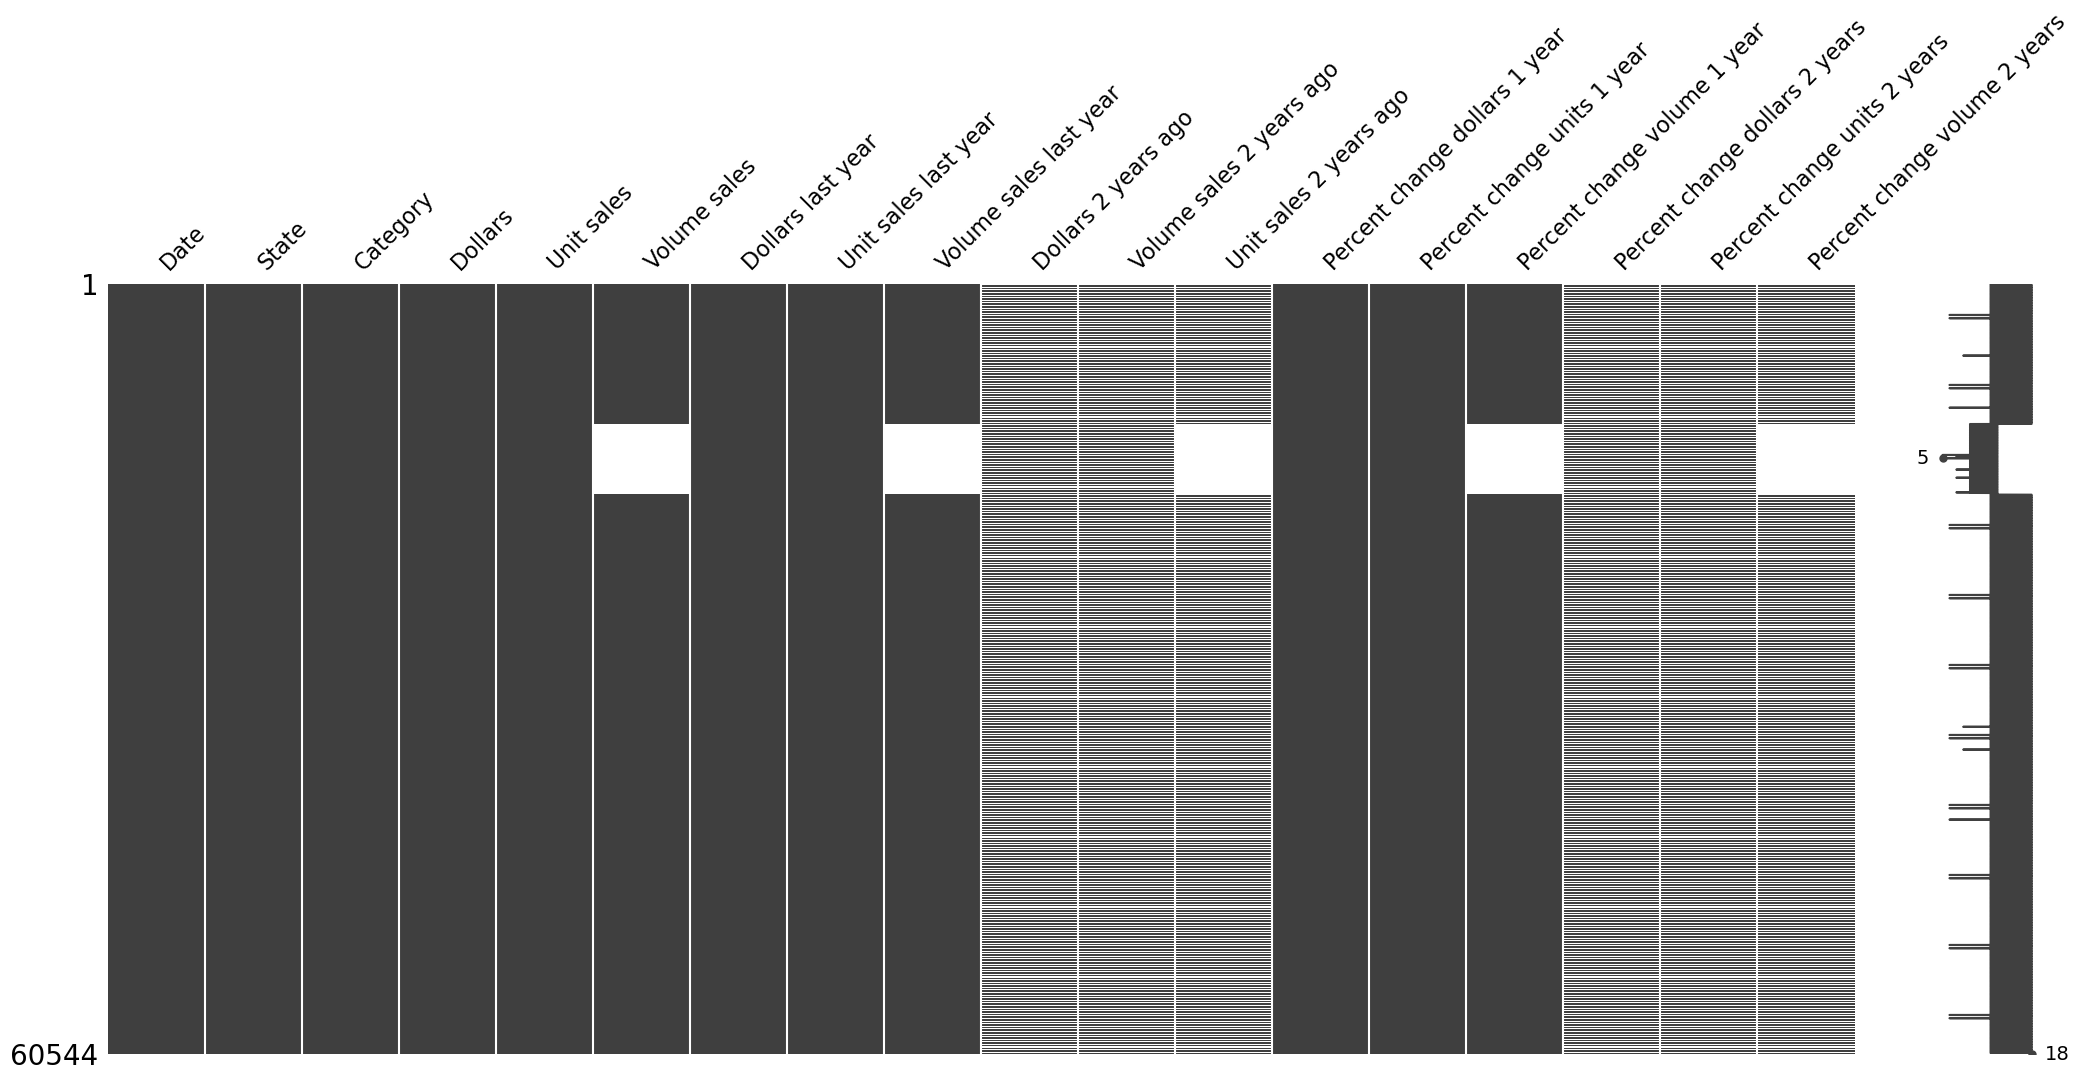

In [18]:
# Lots of numeric null values! Let's explore with a matrix
msno.matrix(data)
plt.show()

In [19]:
# There is a large gap related to volume data
na_volume = data['Volume sales'].isna()
data.loc[na_volume]

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,...,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
11009,2019-10-06,Alabama,Commercially prepared items,67866725.0,28141335.0,NaN,67069920.0,...,NaN,1.2,-2.5,NaN,NaN,NaN,NaN
11010,2019-10-13,Alabama,Commercially prepared items,70052190.0,29044850.0,NaN,70147106.0,...,NaN,-0.1,-3.0,NaN,NaN,NaN,NaN
11011,2019-10-20,Alabama,Commercially prepared items,71538899.0,29441693.0,NaN,69621322.0,...,NaN,2.8,0.0,NaN,NaN,NaN,NaN
11012,2019-10-27,Alabama,Commercially prepared items,70683107.0,28750385.0,NaN,68883369.0,...,NaN,2.6,0.5,NaN,NaN,NaN,NaN
11013,2019-11-03,Alabama,Commercially prepared items,73964097.0,29039728.0,NaN,72694472.0,...,NaN,1.7,-2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,2022-02-13,Wyoming,Commercially prepared items,10386133.0,3236379.0,NaN,8821898.0,...,NaN,17.7,5.5,NaN,7.5,-5.6,NaN
16509,2022-02-20,Wyoming,Commercially prepared items,9655774.0,3023809.0,NaN,8841357.0,...,NaN,9.2,-1.7,NaN,13.4,-2.7,NaN
16510,2022-02-27,Wyoming,Commercially prepared items,9604881.0,3013969.0,NaN,8884082.0,...,NaN,8.1,-2.4,NaN,5.7,-8.9,NaN
16511,2022-03-06,Wyoming,Commercially prepared items,10702627.0,3342621.0,NaN,9487909.0,...,NaN,12.8,1.5,NaN,11.8,-4.4,NaN


In [21]:
# Looks like the same category throughout the printed sample
print(data.loc[na_volume,'Category'].unique())

# Is this consistent? Check for volume values in the category
commercial = data['Category'] == 'Commercially prepared items'
print(data.loc[commercial,'Volume sales'].unique())


['Commercially prepared items']
[nan]


Commercially prepared items do not have any associated volume data.

**7 - Convert the "Date" column to the datetime datatype. Are there any dates that may have been entered incorrectly? Drop these rows if found.**

In [23]:
# Convert column to datetime
data['Date'] = pd.to_datetime(data['Date']).dt.date
type(data.loc[1,'Date'])

<class 'datetime.date'>

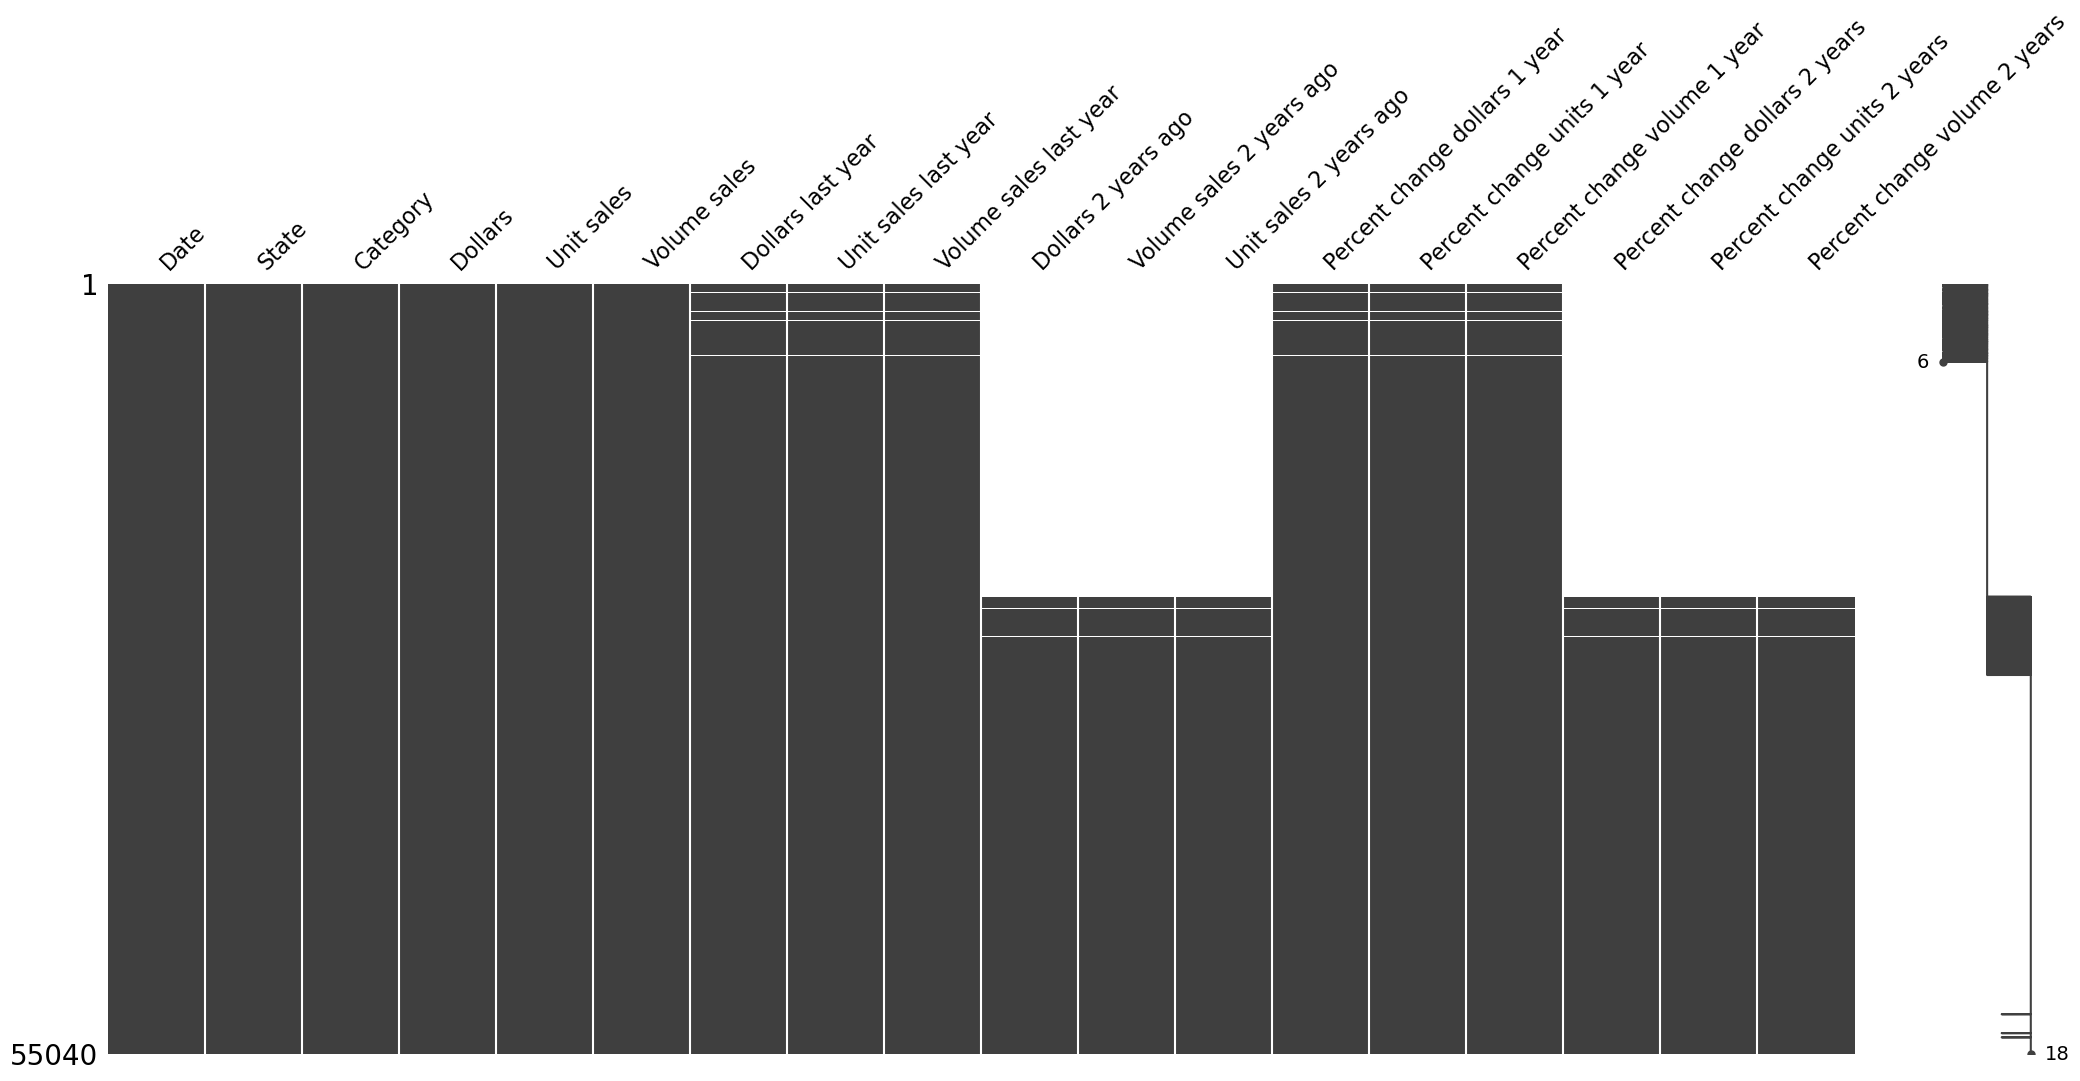

In [24]:
# Look at missing values again, ignoring what was already found with the commercially prepared category
# Sort by Date
msno.matrix(data.loc[~commercial].sort_values(by='Date'))
plt.show()

In [25]:
# Explore the date column
data['Date'].describe()

count          60544
unique           130
top       2019-10-06
freq             473
Name: Date, dtype: object

In [27]:
data['Date'].value_counts() 

Date
2019-10-06    473
2021-04-18    473
2021-07-18    473
2021-07-11    473
2021-07-04    473
             ... 
2020-08-16    473
2022-01-16    472
2022-03-13    472
2042-01-16      1
2022-03-08      1
Name: count, Length: 130, dtype: int64

In [39]:
# One date is far in the future and can be corrected to 1-16-2022
error_date = dt.date(2042, 1, 16)
correct_date = dt.date(2022, 1, 16)
data.loc[data['Date'] == error_date, 'Date'] = correct_date
data['Date'].value_counts()

In [43]:
# 2022-03-08 is close to 2022-03-13 which appears as many times as the other dates, -1. Remapping 2022-03-08 to this date will align with the other dates
error_date = dt.date(2022, 3, 8)
correct_date = dt.date(2022, 3, 13)
data.loc[data['Date'] == error_date, 'Date'] = correct_date
data['Date'].value_counts()

Date
2019-10-06    473
2019-10-13    473
2021-07-25    473
2021-07-18    473
2021-07-11    473
             ... 
2020-06-21    473
2020-06-14    473
2020-06-07    473
2020-05-31    473
2022-03-13    473
Name: count, Length: 128, dtype: int64

In [51]:
# Make sure date is a datetime column type
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].info()

<class 'pandas.core.series.Series'>
Index: 60544 entries, 0 to 60544
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
60544 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.9 MB


**8 - Using "Dollars", calculate the total dollars spent on alcohol in Alabama in year 2020**

In [52]:
# Set year to 2020
year2020 = data['Date'].dt.year == 2020

# Set category to Alcohol
alc = data['Category'] == 'Alcohol'

# Set state to Alabama
al = data['State'] == 'Alabama'

# Combine filters
rows = year2020 & alc & al

# Create new dataframe
alc_sales = data[rows]
alc_sales.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,...,Unit sales 2 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 2 years,Percent change units 2 years,Percent change volume 2 years
14,2020-01-05,Alabama,Alcohol,21546276.0,2636896.0,735411.0,19512063.0,...,NaN,10.4,8.3,8.9,NaN,NaN,NaN
15,2020-01-12,Alabama,Alcohol,19374017.0,2462041.0,665581.0,18521098.0,...,NaN,4.6,3.0,3.2,NaN,NaN,NaN
16,2020-01-19,Alabama,Alcohol,20261030.0,2537450.0,694228.0,18047725.0,...,NaN,12.3,9.9,11.9,NaN,NaN,NaN
17,2020-01-26,Alabama,Alcohol,19536773.0,2423463.0,659656.0,18426907.0,...,NaN,6.0,3.5,4.9,NaN,NaN,NaN
18,2020-02-02,Alabama,Alcohol,20572616.0,2577827.0,701862.0,19615269.0,...,NaN,4.9,3.2,3.8,NaN,NaN,NaN


In [54]:
# Check for nulls in the target column
sum(alc_sales['Dollars'].isnull())

0

In [60]:
# Calculate and report
x = sum(alc_sales['Dollars'])
print('${} billion was spend on alcohol in Alabama in 2020.'.format(round(x / 1000000000, 3)))

$1.318 billion was spend on alcohol in Alabama in 2020.
